In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import cmocean 
import pickle

plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16

data_names =  ['Number of bison', 'Number of grass patches', 'Average altruism', 'SD altruism']
colors = ['saddlebrown', 'green', 'orange', 'moccasin']
timestep_str = 'Timesteps'

Colors from: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

Colormaps from: https://matplotlib.org/tutorials/colors/colormaps.html

Bison colormap from: https://matplotlib.org/cmocean/

In [8]:
def create_test_data():
    n_grass = np.random.randint(0,100, (1,1000))[0]
    n_bison = np.random.randint(0,80, (1,1000))[0]
    avg_alt = np.random.rand(1000)
    alt_sd = np.random.rand(1000) / 4
    test_data = pd.DataFrame([n_bison, n_grass, avg_alt, alt_sd], data_names).T
    return test_data

def import_data(exp_name):
    param_pickle = 'data/' + exp_name + '_parameters.pickle'
    results_pickle = 'data/' + exp_name + '_results.pickle'

    params = pickle.load(open(param_pickle, "rb" ))
    results = pd.read_pickle(results_pickle)
    return params, results

def create_title_str(params_exp, data_names, exp_num, v, t0, t1):
#     number_grass_growth = params_exp['number_grass_growth']
#     amount_grass_growth = params_exp['amount_grass_growth']
    
    number_grass_growth = 0
    amount_grass_growth = 0
    
#     Bison_reproduce_threshold = params_exp['bison_reproduce_threshold']
    
    Bison_reproduce_threshold = 0
    
    variable_str = data_names[v-1]
    if v == 3:
        variable_str += f' $\pm$ STD'
    title_str = f'{variable_str} Run {exp_num} T({t0}-{t1}) | \n' + \
                f'NGG: {str(number_grass_growth)} | AGG: {str(amount_grass_growth)} | BRT: {str(Bison_reproduce_threshold)}'
    return title_str

def plot_line(params, results, exp_num, v, t0=0, t1=False, save_fig=False):
    """
    Plot the results in a lineplot of a single run
        results: Pandas DataFrame with multindex 
        exp_num: int ID for the selected run
        v: variable to plot[1=Bisons, 2=Grass, 3=Average ALtruism]
        t0: start_timestep
        t1: end_timestep
        save_fig: str for name
    """ 
    exp_data = results.loc[exp_num]
    data_names = exp_data.columns

    if not(t1):
        t1 = len(exp_data) - 1
    
    if v in [1,2]:
        plt.plot(exp_data[data_names[v-1]].loc[t0:t1], color=colors[v-1])
    if v==3: 
        x = np.arange(t0, t1+1)
        y = exp_data[data_names[v-1]].loc[t0:t1]
        error = exp_data[data_names[v]].loc[t0:t1]
        plt.plot(y, color=colors[v-1])
        plt.fill_between(x, y-error, y+error, color=colors[v])
    
    params_exp = params.loc[exp_num]
    title_str = create_title_str(params_exp, data_names, exp_num, v, t0, t1)
    
    plt.title(title_str)
    plt.xlabel(timestep_str)
    plt.ylabel(data_names[v-1])
    plt.grid()
    plt.tight_layout()
    if save_fig:
        plt.savefig('Plots\Test_Line.png')
    plt.show()
    
def plot_scatter_per_run(params, results, exp_num, vx, vy, vc, t0=0, t1=False, save_fig=False):
    """
    Plot the results of a single run in a scatterplot 
    Input variables
        results: Pandas DataFrame with multindex 
        exp_num: int ID for the selected run
        v: variable to plot[1=Bisons, 2=Grass, 3=Average ALtruism]
        t0: start_timestep
        t1: end_timestep
        save_fig: str for name
    """ 
    exp_data = results.loc[exp_num]
    data_names = exp_data.columns
    colormaps = [cmocean.cm.turbid, 'Greens', 'RdYlGn']
    colormap = colormaps[vc-1]

    if not(t1):
        t1 = len(exp_data) - 1
    
    x = exp_data[data_names[vx-1]].loc[t0:t1]
    y = exp_data[data_names[vy-1]].loc[t0:t1]
    c = exp_data[data_names[vc-1]].loc[t0:t1]

    plt.grid()
    plt.scatter(x, y, c=c, cmap=colormap, zorder=10)
    plt.xlabel(data_names[vx-1])
    plt.ylabel(data_names[vy-1])
    cbar = plt.colorbar()
    cbar.set_label(data_names[vc-1])
    
    params_exp = params.loc[exp_num]
    title_str = create_title_str(params_exp, data_names, exp_num, vy, t0, t1)
    var_str = f'{data_names[vy-1]} vs. {data_names[vx-1]}'
    plt.title(title_str)

    plt.tight_layout()
    if save_fig:
        plt.savefig('Plots\Test_Scatter.png')
    plt.show()
    
def plot_scatter_avg(params, avg_per_run, vx, vy, vc, save_fig=False):
    """
    Plot the results of a single run in a scatterplot 
    Input variables
        results: Pandas DataFrame with multindex 
        exp_num: int ID for the selected run
        v: variable to plot[1=Bisons, 2=Grass, 3=Average ALtruism, 5=Grass growth]
        t0: start_timestep
        t1: end_timestep
        save_fig: str for name
    """ 
    colormaps = [cmocean.cm.turbid, 'Greens', 'RdYlGn', None, 'Greens']
    colormap = colormaps[vc-1]

    x = avg_per_run[data_names[vx-1]]
    y = avg_per_run[data_names[vy-1]]
    c = avg_per_run[data_names[vc-1]]

    plt.grid()
    plt.scatter(x, y, c=c, cmap=colormap, zorder=10)
    plt.xlabel(data_names[vx-1])
    plt.ylabel(data_names[vy-1])
    cbar = plt.colorbar()
    cbar.set_label(data_names[vc-1])
    plt.tight_layout()
    if save_fig:
        plt.savefig('Plots\Test_Scatter.png')
    plt.show()

### Create graphs

In [102]:
def variable_params_func(params):
    index_run = np.where(np.array(params.columns) == 'Run')[0][0]
    return list(np.array(params.columns)[:index_run])

In [109]:
exp_name = 'monday_experiment'
params, results = import_data(exp_name)
variable_params = variable_params_func(params)
results[results['Bison'] == 0]

,,Bison,Grass,Altruism (avg),Altruism (std),Battles


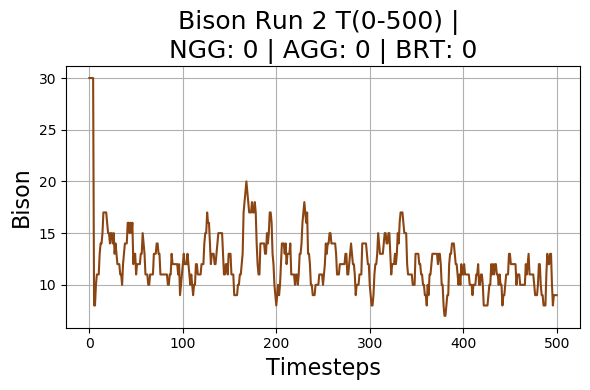

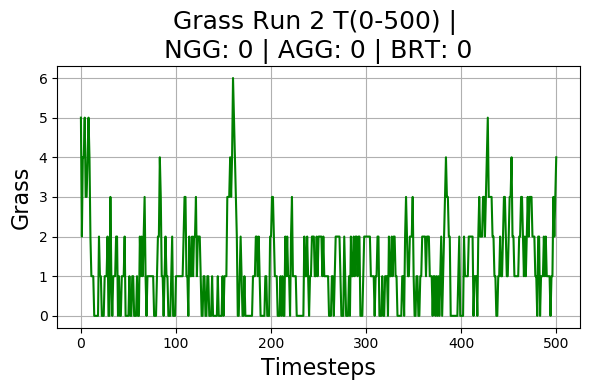

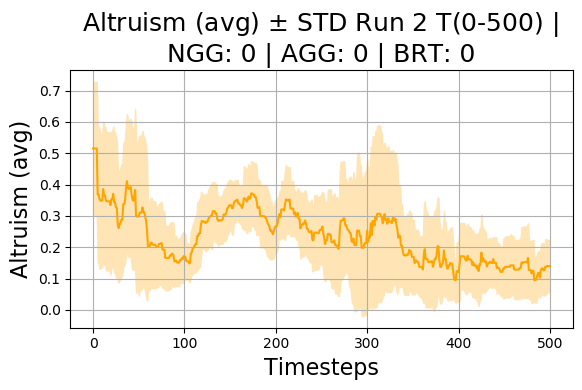

In [105]:
exp_num = 2
plot_line(params, results, exp_num=exp_num, v=1, t0=0, t1=False, save_fig=False)
plot_line(params, results, exp_num=exp_num, v=2, t0=0, t1=False, save_fig=False)
plot_line(params, results, exp_num=exp_num, v=3, t0=0, t1=False, save_fig=False)

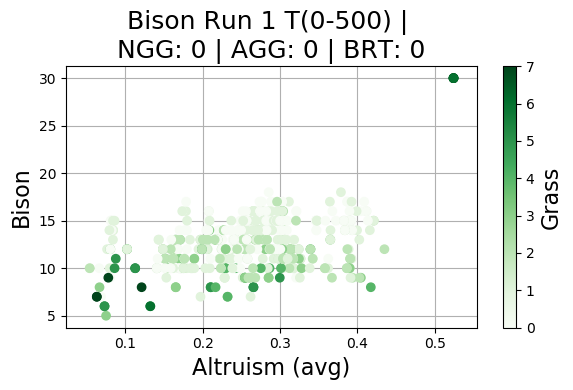

In [67]:
plot_scatter_per_run(params, results, exp_num=1, vx=3, vy=1, vc=2, t0=0, t1=False, save_fig=False)

## AVERAGES

In [110]:
avg_per_run = results.mean(axis=0, level=0)
for param in variable_params:
    avg_per_run[param] = params[param]
avg_per_run.head()

,Bison,Grass,Altruism (avg),Altruism (std),Battles,clustering_std,movement_weight_fights
0,11.067864,1.544910,0.143814,0.081842,3.069860,0.5,0.1
1,12.712575,1.367265,0.254973,0.143855,3.361277,0.5,0.1
2,12.265469,1.233533,0.235324,0.130425,3.295409,0.5,0.1
3,11.465070,1.538922,0.184179,0.115104,3.097804,0.5,0.1
4,11.518962,1.692615,0.147944,0.119192,2.998004,0.5,0.1


In [80]:
list(zip(avg_per_run.columns, range(1, len(avg_per_run.columns)+1)))

[('Bison', 1),
 ('Grass', 2),
 ('Altruism (avg)', 3),
 ('Altruism (std)', 4),
 ('Battles', 5),
 ('clustering_std', 6),
 ('movement_weight_fights', 7)]

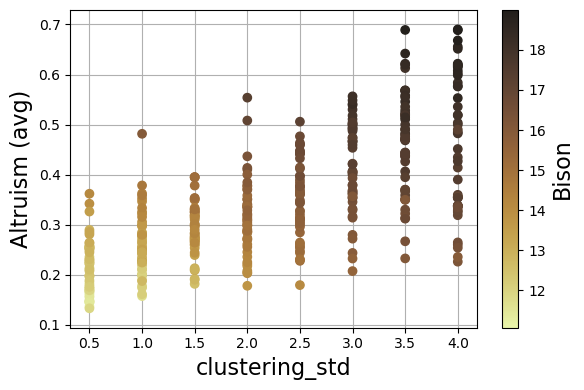

In [98]:
data_names = list(avg_per_run.columns)
plot_scatter_avg(params, avg_per_run, vx=6, vy=3, vc=1, save_fig=False)

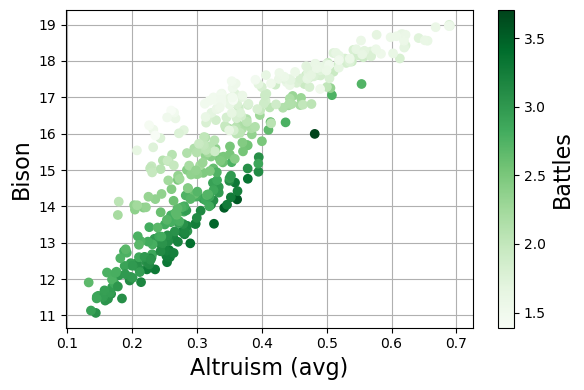

In [112]:
plot_scatter_avg(params, avg_per_run, 3, 1, 5, save_fig=False)